In [3]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import time


In [8]:
# Initialize pytrends request
pytrends = TrendReq(hl='en-US', tz=360)

# List of keywords
keywords = [
    "Astrology",
    "Horoscope",
    "Fortune telling",
    "Psychic",
    "Tarot reading",
    "Numerology",
    "Palm reading",
    "Clairvoyant",
    "Crystal ball",
    "Magic spells",
    "Occult",
    "Spiritual healing",
    "Witchcraft",
    "Mediumship",
    "Superstition"
]

# Function to fetch Google Trends data for a list of keywords
def fetch_trends_data(keywords, timeframe='2015-06-23 2017-06-23', geo='US'):
    all_data = pd.DataFrame()

    for keyword in keywords:
        try:
            pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo=geo, gprop='')
            data = pytrends.interest_over_time()
            if not data.empty:
                data = data.drop(columns=['isPartial'])  # Remove 'isPartial' column if it exists
                all_data = pd.concat([all_data, data], axis=1)
                print(f"Data for {keyword} fetched successfully.")
            else:
                print(f"No data found for keyword: {keyword}")
        except Exception as e:
            print(f"An error occurred for keyword '{keyword}': {e}")
        # Adding a delay between requests to avoid rate limiting
        time.sleep(5)

    return all_data

# Fetch data for the keywords
trends_data = fetch_trends_data(keywords)

# Save the data to a CSV file
trends_data.to_csv('google_trends_data_US.csv')

# Display the data
print(trends_data.head())


An error occurred for keyword 'Astrology': HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
An error occurred for keyword 'Horoscope': The request failed: Google returned a response with code 500
An error occurred for keyword 'Fortune telling': The request failed: Google returned a response with code 500
An error occurred for keyword 'Psychic': HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
An error occurred for keyword 'Tarot reading': HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
An error occurred for keyword 'Numerology': HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
An error occurred for keyword 'Palm reading': HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


KeyboardInterrupt: 

In [6]:
trends_data = pd.read_csv('google_trends_data_bref.csv', parse_dates=True, index_col='date')

In [7]:
trends_data.head()

,Astrology,Horoscope,Fortune telling,Psychic,Tarot reading,Numerology,Palm reading,Clairvoyant,Crystal ball,Magic spells,Occult,Spiritual healing,Witchcraft,Mediumship,Superstition
date,,,,,,,,,,,,,,,
2015-06-21,56,63,0,66,96,52,47,45,41,64,80,0,55,0,58
2015-06-28,71,70,45,63,88,46,73,56,55,61,73,62,49,0,49
2015-07-05,58,66,35,70,91,62,58,61,45,100,68,45,48,0,65
2015-07-12,65,71,67,67,94,62,59,52,60,89,72,89,55,0,59
2015-07-19,60,66,53,69,85,56,55,55,40,64,56,55,52,0,58


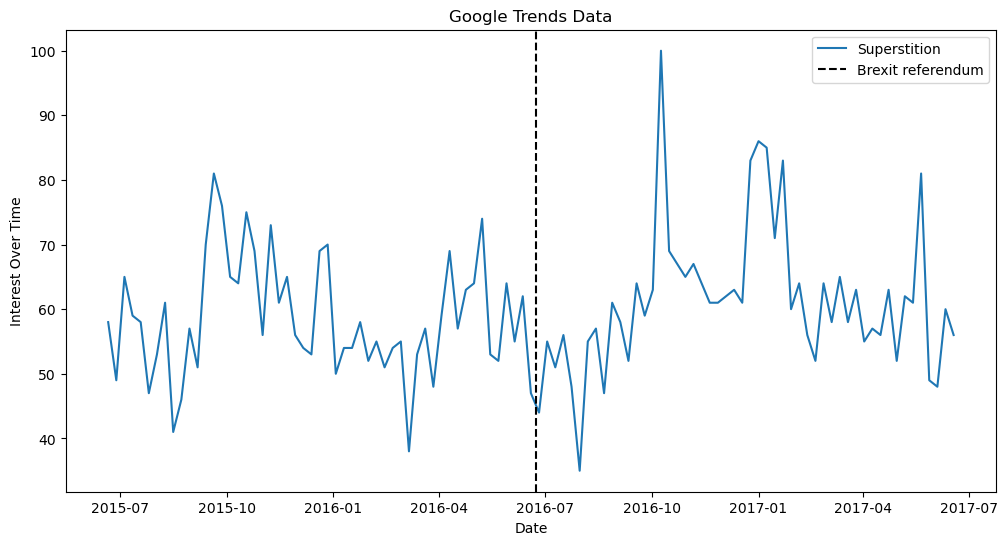

In [25]:

# Plotting the data
def plot_trends(data, keywords, vline_date=None):
    plt.figure(figsize=(12, 6))
    for keyword in keywords:
        topic_data = data[keyword]
        plt.plot(topic_data.index, topic_data, label=keyword)
    
    # Check if a vertical line date is provided
    if vline_date:
        # Convert the string date to datetime if your index is in datetime format
        vline_datetime = pd.to_datetime(vline_date)
        plt.axvline(x=vline_datetime, color='k', linestyle='--', label='Brexit referendum')
    
    plt.title('Google Trends Data')
    plt.xlabel('Date')
    plt.ylabel('Interest Over Time')
    plt.legend()
    plt.show()

# Assuming trends_data is your dataframe and it's indexed by date in datetime format
# Plot the trends and add a vertical line
plot_trends(trends_data, ["Superstition"], '2016-06-23')


notes:
horoscope has a yearly peak at new year